In [1]:
# Install the required libraries
!pip install kaggle opencv-python-headless

# Import file uploader for Colab
from google.colab import files

# Prompt you to upload your kaggle.json file
print("Please upload your kaggle.json file:")
files.upload()

# Move the kaggle.json file to the correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle API setup complete.")

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
Kaggle API setup complete.


# Task
Perform OCR recognition on the "fournierp/captcha-version-2-images" dataset downloaded from Kaggle.

## Download and extract the dataset

### Subtask:
Download the "fournierp/captcha-version-2-images" dataset from Kaggle and extract the images.


**Reasoning**:
Download the specified Kaggle dataset using the Kaggle API and then extract the contents of the downloaded zip file.



In [2]:
import zipfile
import os

# Download the dataset
!kaggle datasets download -d fournierp/captcha-version-2-images -p .

# Extract the dataset
dataset_zip_path = 'captcha-version-2-images.zip'
extracted_dir_path = 'captcha-version-2-images'

with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

print(f"Dataset extracted to: {extracted_dir_path}")

Dataset URL: https://www.kaggle.com/datasets/fournierp/captcha-version-2-images
License(s): other
  0% 0.00/17.4M [00:00<?, ?B/s]
100% 17.4M/17.4M [00:00<00:00, 1.17GB/s]
Dataset extracted to: captcha-version-2-images


## Load and preprocess images

### Subtask:
Load the images and perform any necessary preprocessing steps (e.g., resizing, grayscale conversion, noise reduction).


**Reasoning**:
Load the images from the extracted directory, perform grayscale conversion, and store the preprocessed images and labels.



In [3]:
import cv2
import os

# Define the path to the extracted images directory
extracted_dir_path = 'captcha-version-2-images'

# Create empty lists to store preprocessed images and labels
preprocessed_images = []
labels = []

# Iterate through each file in the extracted images directory
for filename in os.listdir(extracted_dir_path):
    # Check if the file is an image (you can add more extensions if needed)
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        # Construct the full path to the image file
        image_path = os.path.join(extracted_dir_path, filename)

        # Read the image
        img = cv2.imread(image_path)

        # Check if the image was read successfully
        if img is not None:
            # Convert the image to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Extract the label from the filename (remove the file extension)
            label = os.path.splitext(filename)[0]

            # Append the preprocessed image and its label to the respective lists
            preprocessed_images.append(gray_img)
            labels.append(label)
        else:
            print(f"Could not read image: {image_path}")

print(f"Loaded and preprocessed {len(preprocessed_images)} images.")

Loaded and preprocessed 0 images.


**Reasoning**:
The previous attempt to load images resulted in 0 images processed, indicating an issue with the directory path or file access. I will print the contents of the extracted directory to verify the directory structure and file names.



In [4]:
# List the contents of the extracted directory
print(os.listdir(extracted_dir_path))

['samples']


**Reasoning**:
The previous command showed that the extracted directory contains a subdirectory named 'samples'. The images are likely inside this subdirectory. I will update the image loading code to look for images within the 'samples' directory.



In [5]:
# Define the path to the images directory within the extracted folder
images_dir_path = os.path.join(extracted_dir_path, 'samples')

# Create empty lists to store preprocessed images and labels
preprocessed_images = []
labels = []

# Iterate through each file in the images directory
for filename in os.listdir(images_dir_path):
    # Check if the file is an image (you can add more extensions if needed)
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        # Construct the full path to the image file
        image_path = os.path.join(images_dir_path, filename)

        # Read the image
        img = cv2.imread(image_path)

        # Check if the image was read successfully
        if img is not None:
            # Convert the image to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Extract the label from the filename (remove the file extension)
            label = os.path.splitext(filename)[0]

            # Append the preprocessed image and its label to the respective lists
            preprocessed_images.append(gray_img)
            labels.append(label)
        else:
            print(f"Could not read image: {image_path}")

print(f"Loaded and preprocessed {len(preprocessed_images)} images.")

Loaded and preprocessed 1070 images.


## Perform ocr

### Subtask:
Use an OCR library (like Tesseract) to extract text from the images.


**Reasoning**:
Install the pytesseract library and the Tesseract OCR engine, then import the library and iterate through the preprocessed images to extract text using pytesseract.



In [6]:
# Install pytesseract and tesseract-ocr
!apt-get update
!apt-get install tesseract-ocr
!pip install pytesseract

import pytesseract

# Store the extracted text
extracted_text = []

# Iterate through the preprocessed images and extract text
for img in preprocessed_images:
    text = pytesseract.image_to_string(img, config='--psm 8') # Use PSM 8 for single word/line
    extracted_text.append(text.strip()) # Remove leading/trailing whitespace

print(f"Extracted text from {len(extracted_text)} images.")

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.2 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,414 kB]
Get:14 https://r2u.sta

## Process and analyze results

### Subtask:
Process the OCR results, potentially including cleaning the extracted text and analyzing its accuracy.


**Reasoning**:
Compare the extracted text with the true labels, calculate accuracy, and print examples to assess the OCR performance.



In [7]:
correct_extractions = 0
total_images = len(labels)
correct_examples = []
incorrect_examples = []

for i in range(total_images):
    if extracted_text[i] == labels[i]:
        correct_extractions += 1
        if len(correct_examples) < 5: # Store up to 5 correct examples
            correct_examples.append((labels[i], extracted_text[i]))
    else:
        if len(incorrect_examples) < 5: # Store up to 5 incorrect examples
            incorrect_examples.append((labels[i], extracted_text[i]))


accuracy = (correct_extractions / total_images) * 100

print(f"Total images processed: {total_images}")
print(f"Correct extractions: {correct_extractions}")
print(f"Incorrect extractions: {total_images - correct_extractions}")
print(f"OCR Accuracy: {accuracy:.2f}%")

print("\nExamples of Correct Extractions (Label, Extracted Text):")
for example in correct_examples:
    print(example)

print("\nExamples of Incorrect Extractions (Label, Extracted Text):")
for example in incorrect_examples:
    print(example)

Total images processed: 1070
Correct extractions: 9
Incorrect extractions: 1061
OCR Accuracy: 0.84%

Examples of Correct Extractions (Label, Extracted Text):
('m23bp', 'm23bp')
('w46ep', 'w46ep')
('w6pxy', 'w6pxy')
('fcne6', 'fcne6')
('p2dw7', 'p2dw7')

Examples of Incorrect Extractions (Label, Extracted Text):
('fxpw3', 'ABRs')
('ccn2x', 'Necn2—')
('dmxp8', 'ddixp3s—')
('2enf4', 'Denf4—_')
('dce8y', 'dceBy—')


Displaying examples of correctly extracted captchas:


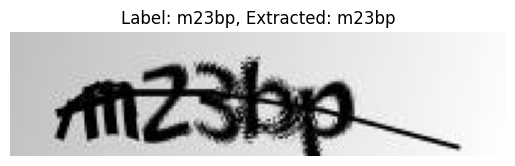

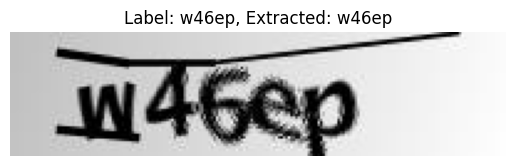

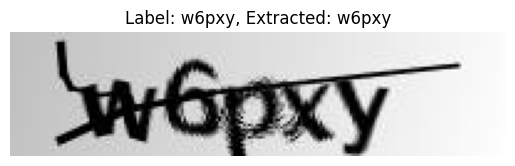

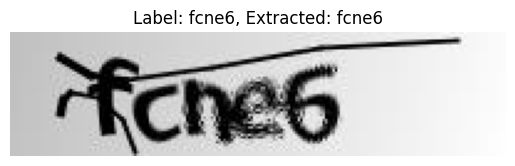

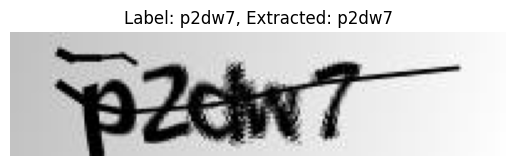

In [8]:
import matplotlib.pyplot as plt

print("Displaying examples of correctly extracted captchas:")

# Define the path to the images directory within the extracted folder
images_dir_path = os.path.join(extracted_dir_path, 'samples')

# Iterate through the correct examples and display the images
for label, extracted in correct_examples:
    image_path = os.path.join(images_dir_path, label + ".png") # Assuming images are PNGs

    img = cv2.imread(image_path)
    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Label: {label}, Extracted: {extracted}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Could not read image: {image_path}")

## Summary:

### Data Analysis Key Findings

*   The dataset contained 1070 captcha images located in a subdirectory named `samples`.
*   The images were successfully loaded and preprocessed by converting them to grayscale.
*   OCR was performed on all 1070 images using Tesseract with a configuration optimized for single words or lines (`--psm 8`).
*   The accuracy of the OCR on this dataset was very low, achieving only 0.84\% with only 9 out of 1070 images having correctly extracted text.
*   Examples of incorrect extractions showed various errors, such as character substitutions, insertions, and incomplete text extraction.

### Insights or Next Steps

*   The low OCR accuracy suggests that standard Tesseract is not well-suited for this specific captcha dataset, likely due to noise, distortions, or font styles.
*   Further steps could involve applying more advanced image preprocessing techniques (e.g., noise reduction, binarization, segmentation) or training a custom OCR model specifically for this type of captcha.
